# NLO: Non-Linear Oscillator

http://web.physics.ucsb.edu/~fratus/phys103/LN/NLO.pdf

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

General NLO:
$$ \ddot{x}+2 \beta \dot{x}+\omega^{2} x+\phi x^{2}+\epsilon x^{3}=f(t) $$

Duffing equation: $$ \ddot{x} + \omega^2 x + \epsilon x^3 = 0$$ where $\omega = \sqrt{\frac{k}{m}}$ where $k$ is a constant and $m$ is a mass, and $\epsilon = \frac{\lambda}{6m}, \lambda > 0$

In [139]:
n = 100
periods = 5
t = np.linspace(0, periods * np.pi, 100)
dt = t[1] - t[0]

In [161]:
def get_diff(x, x0 = 0, dx0 = .5):
    x[0] = x0
    dx = np.gradient(x, dt, edge_order = 2)
    dx[0] = dx0
    d2x = np.gradient(dx, dt, edge_order = 2)
    return nlo(d2x, dx, x)

In [162]:
guess = np.ones_like(t)

In [182]:
omega = 1
epsilon = .05
beta = .1
phi = .1
F = .0
forcing = lambda x: F * np.sin(x)
nlo = lambda d2x, dx, x: d2x + 2 * beta * dx + (omega ** 2) * x + phi * (x ** 2) + epsilon * (x ** 3) - forcing(x)

In [183]:
opt_sol = optimize.root(get_diff, guess, method='lm')

In [184]:
opt_sol.success, opt_sol.message

(True,
 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000 and the relative error between two consecutive iterates is at \n  most 0.000000')

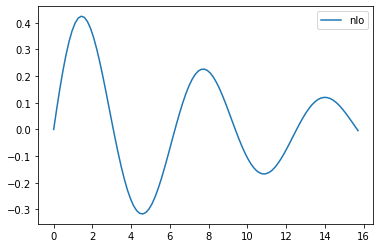

In [186]:
plt.plot(t, opt_sol.x, label='nlo')
plt.legend()